In [1]:
import onetick.query as otq
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.width',200)

In [2]:
otq.WhereClause?

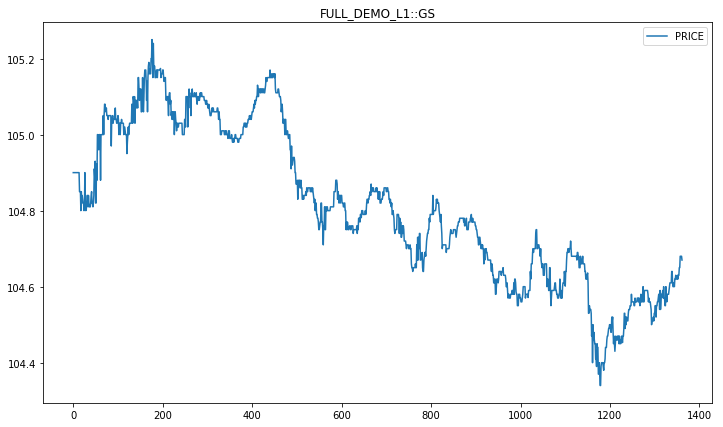

,Time,PRICE,SIZE,EXCHANGE
0,2005-01-03 14:31:52.011,104.9,40400,N
1,2005-01-03 14:31:53.008,104.9,1200,T
2,2005-01-03 14:31:53.508,104.9,1000,T
3,2005-01-03 14:31:53.511,104.9,100,T
4,2005-01-03 14:31:53.515,104.9,200,T


In [3]:
#Trades
pt = otq.Passthrough(fields='PRICE,SIZE,EXCHANGE').tick_type('TRD')
data = otq.run(otq.Graph(pt),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16),timezone='GMT')

df = pd.DataFrame(data['FULL_DEMO_L1::GS'])
df[['PRICE']].plot(title='FULL_DEMO_L1::GS',figsize=(12,7))
plt.show()
df.head()

In [ ]:
#Quotes
pt=pt.tick_type('QTE')
pt.fields='BID_PRICE,BID_SIZE,ASK_PRICE,ASK_SIZE,EXCHANGE'
data = otq.run(otq.Graph(pt),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
df = pd.DataFrame(data['FULL_DEMO_L1::GS'])
df[['ASK_PRICE']].plot(title='FULL_DEMO_L1::GS',figsize=(12,7))
plt.show()
df.head()

In [ ]:
#Filtered Passthrough
pt = otq.Passthrough(fields='PRICE,SIZE,EXCHANGE').tick_type('TRD').sink(otq.WhereClause(where='PRICE < 104.9')).sink(otq.Table(fields='PRICE'))

graph = otq.Graph(pt)
graph.render()
data = otq.run(graph,symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
df = pd.DataFrame(data['FULL_DEMO_L1::GS'])
df[['PRICE']].plot(figsize=(12,7))
plt.show()
df.head()

In [ ]:
otq.

In [ ]:
#Filtered Passthrough
pt = otq.Passthrough(fields='PRICE,SIZE,EXCHANGE').tick_type('TRD') >> otq.WhereClause(where='PRICE < 104.9') \
    >> otq.Table(fields='PRICE')
data = otq.run(otq.Graph(pt),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
print(data)
df = pd.DataFrame(data['FULL_DEMO_L1::GS'])
df[['PRICE']].plot(figsize=(12,7))
plt.show()
df.head()

In [ ]:
#Filtered Passthrough
pt = otq.Passthrough(fields='PRICE,SIZE,EXCHANGE').tick_type('TRD') >> otq.WhereClause(where='PRICE < 104.9') \
    >> otq.Table(fields='PRICE')
data = otq.run(otq.Graph(pt),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
df = pd.DataFrame(data['FULL_DEMO_L1::GS'])
df[['PRICE']].plot(figsize=(12,7))
plt.show()
df.head()

In [ ]:
#Filtered Passthrough
chain = otq.Chainlet(otq.Passthrough(fields='PRICE,SIZE,EXCHANGE').tick_type('TRD'),
                 otq.WhereClause(where='PRICE < 104.9'),
                 otq.Table(fields='PRICE')
                )
data = otq.run(otq.Graph(chain),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))
df = pd.DataFrame(data['FULL_DEMO_L1::GS'])

df[['PRICE']].plot(figsize=(12,7))
plt.show()
df.head()

In [ ]:
#Filtered Passthrough
chain = otq.Chainlet(otq.Passthrough(fields='PRICE,SIZE,EXCHANGE').tick_type('TRD'),
                 otq.WhereClause(where='PRICE < 104.9').node_name('where'),
                 otq.Table(fields='PRICE')
                )
data = otq.run(otq.Graph(chain),symbols='FULL_DEMO_L1::GS',start=datetime(2005,1,3,9,30),end=datetime(2005,1,3,16))

df = pd.DataFrame(data['FULL_DEMO_L1::GS'])

df[['PRICE']].plot(figsize=(12,7))
plt.show()
df.head()

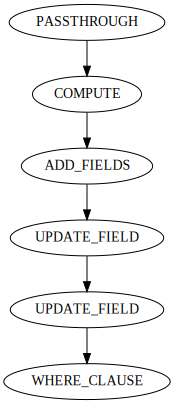

                     Time  PRICE  AVERAGE.VALUE  STDDEV.VALUE      LBAND      UBAND SIGNAL
0 2006-06-01 13:01:00.178  22.65      22.696364      0.015535  22.665295  22.727433    BUY
1 2006-06-01 13:01:00.180  22.65      22.690714      0.018695  22.653325  22.728104    BUY
2 2006-06-01 13:12:05.985  22.70      22.725600      0.006974  22.711652  22.739548    BUY
3 2006-06-01 13:12:05.988  22.66      22.717586      0.022230  22.673126  22.762046    BUY
4 2006-06-01 13:21:56.946  22.72      22.705000      0.006708  22.691584  22.718416   SELL


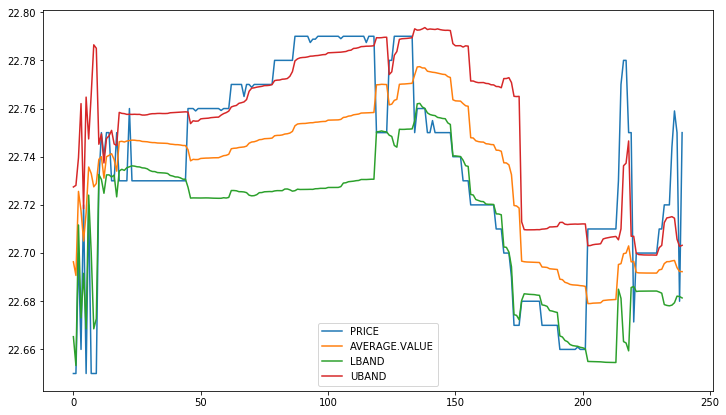

                     Time  PRICE  AVERAGE.VALUE  STDDEV.VALUE      LBAND      UBAND SIGNAL
0 2006-06-01 13:01:00.178  22.65      22.696364      0.015535  22.665295  22.727433    BUY
1 2006-06-01 13:01:00.180  22.65      22.690714      0.018695  22.653325  22.728104    BUY
2 2006-06-01 13:12:05.988  22.66      22.712727      0.018873  22.674981  22.750474    BUY
3 2006-06-01 13:12:05.988  22.66      22.710000      0.021733  22.666533  22.753467    BUY
4 2006-06-01 13:31:36.739  22.73      22.720909      0.002875  22.715159  22.726659   SELL


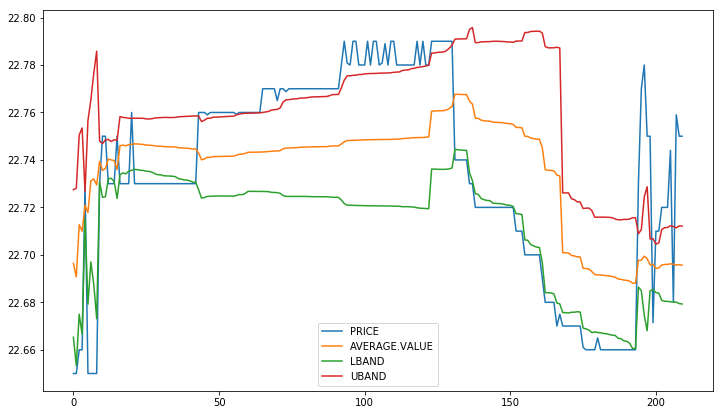

                     Time  PRICE  AVERAGE.VALUE  STDDEV.VALUE      LBAND      UBAND SIGNAL
0 2006-06-01 13:01:00.230  22.74      22.685000      0.025593  22.633814  22.736186   SELL
1 2006-06-01 13:12:05.988  22.66      22.705507      0.022233  22.661041  22.749973    BUY
2 2006-06-01 13:32:45.647  22.65      22.707053      0.021661  22.663730  22.750375    BUY
3 2006-06-01 13:42:02.291  22.65      22.716623      0.022783  22.671057  22.762188    BUY
4 2006-06-01 13:53:30.239  22.65      22.722391      0.021147  22.680098  22.764685    BUY


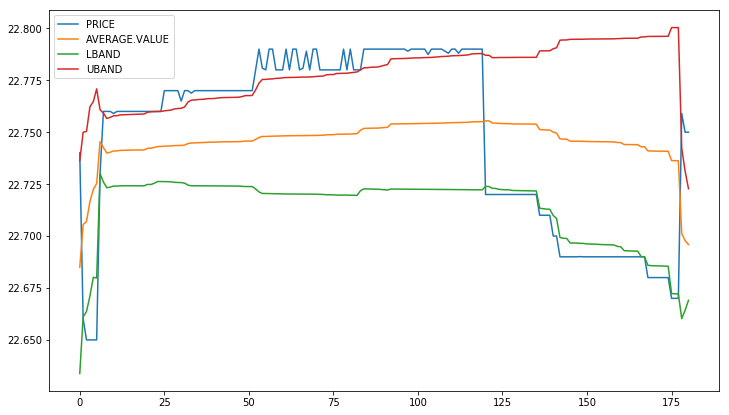

                     Time  PRICE  AVERAGE.VALUE  STDDEV.VALUE      LBAND      UBAND SIGNAL
0 2006-06-01 13:01:00.230  22.74      22.685000      0.025593  22.633814  22.736186   SELL
1 2006-06-01 13:12:05.988  22.65      22.703333      0.024267  22.654799  22.751867    BUY
2 2006-06-01 13:32:45.647  22.65      22.705253      0.023109  22.659034  22.751471    BUY
3 2006-06-01 13:42:02.291  22.65      22.715226      0.024159  22.666908  22.763544    BUY
4 2006-06-01 13:53:30.239  22.65      22.716316      0.024918  22.666479  22.766153    BUY


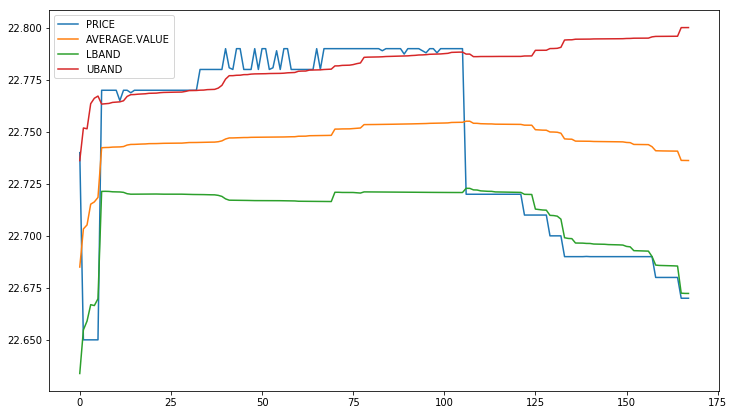

In [4]:
#Bollinger-bands
bandwidth=2
BANDS = 'LBAND=AVERAGE.VALUE-(STDDEV.VALUE*{BAND}), \
            UBAND=AVERAGE.VALUE+(STDDEV.VALUE*{BAND}),SIGNAL=\'\''.format(BAND=bandwidth)
                
symbol = 'FULL_DEMO_L1::MSFT'
start_date = datetime(2006,6,1,9,30)
end_date = datetime(2006,6,1,16)
interval = 300

#create EPs
pt = otq.Passthrough(fields='PRICE').tick_type('TRD')
compute = otq.ComputeEp(compute='AVERAGE,STDDEV', show_all_fields=True, bucket_interval=interval, is_running_aggr=True)
add_fields = otq.AddFields(fields=BANDS)
buy_update_field = otq.UpdateField(field='SIGNAL', value='"BUY"', where='PRICE<LBAND and PRICE[-1] >= LBAND[-1]')
sell_update_field = otq.UpdateField(field='SIGNAL',value='"SELL"', where='PRICE > UBAND and PRICE[-1]<=UBAND[-1]')
where = otq.WhereClause(where='SIGNAL!=""')

#construct the graph via a utility method
g = otq.Graph(otq.Chainlet(pt,compute,add_fields,buy_update_field,sell_update_field,where))

#render constructed graph
g.render()

#run the graph for multiple values of compute bucket
for i in (300,600,3000,6000):
    compute.bucket_interval = i

    #run query and post-process
    data = otq.run(g,[symbol],start_date,end_date)
    df = pd.DataFrame(data[symbol])
    pd.set_option('display.width', 100)
    print(df.head())
    df[['PRICE','AVERAGE.VALUE','LBAND','UBAND']].plot(figsize=(12,7))
    plt.show()